# Threshholding

## Converting a color image to binary

### we convert color image to gray scale and then find Threshholds(لبه ها)
### binary image means pixels is black(0) or white(255). no other 

### to threshold an image : 
    -> cv2.threshold(img,threshold value, max value)
    -> to fiding the max value you can use img.max -> returns max value in img
    -> all values in img that are less than threshold value set to 0 and all value bigger than threshold value set to max_value

## Threshhold has some Types ( full reference is in Threshold_Types.png ) 
    -> THRESH_BINARY
    -> THRESH_BINARY_INV
    -> THRESH_TRUNC
    -> THRESH_TOZERO
    -> THRESH_TOZERO_INV

## if after thresholding , your image quality redused :
    -> Try another threshold type
    -> Try another threshold value
    -> Do adaptive thresholding ->> EX :: adp_threshold = cv2.adaptiveThreshold(img,max_value,adaptive method,threshold type,block size,subtract value)
    
        -> Adaptive methods : 1) means    2) Guasian
        -> block size : nimber of neighborhood pixels :: usually : 3 , 5 or 7 or 11 ( odd number )
        -> subtract value : substract form mean value :: normally positive 
        
        
# Be Creative :
### we can do some thresholdings and save them and then blending theme together





### Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def p_print(img,a,b,cmap):
    ax,fig = plt.subplots(figsize=(a,b))
    plt.imshow(img,cmap)

In [5]:
img = cv2.imread('rainbow.jpg',0) # pass 0 to show it as gray scale image

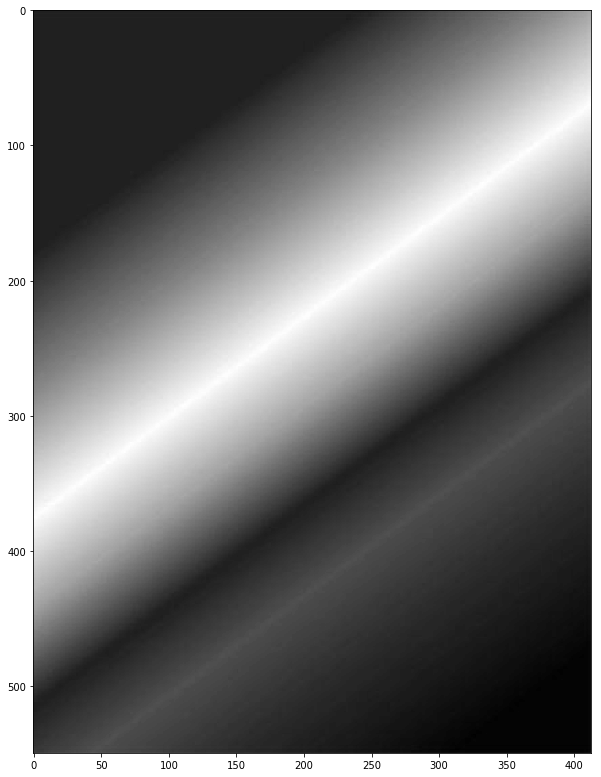

In [9]:
p_print(img,10,15,'gray') # show pic by matplotlib with gray scale cmap

In [10]:
# 127 points is our thresholds(because 255/2 = 127) that means all values less than 127 is 0 and all values bigger than 127 is 255
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 

In [11]:
ret # this value is same with Thresh value

127.0

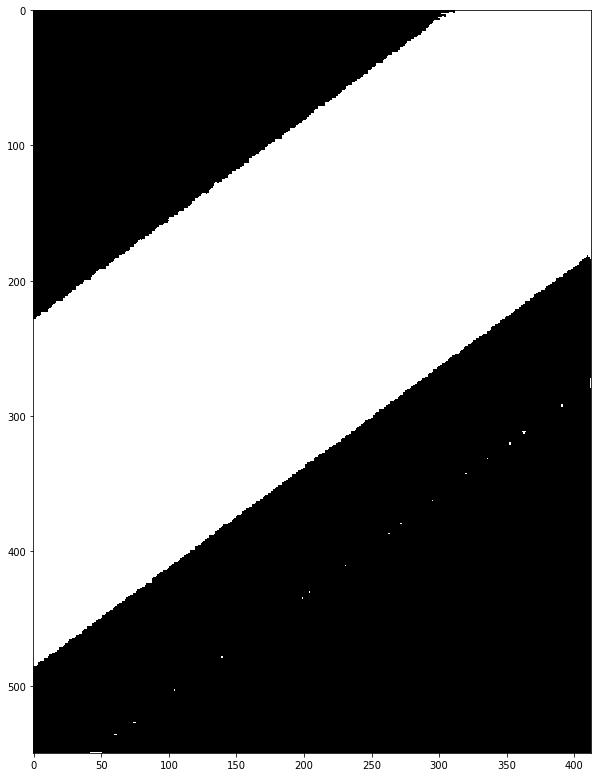

In [12]:
p_print(thresh1,10,15,'gray')

In [13]:
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

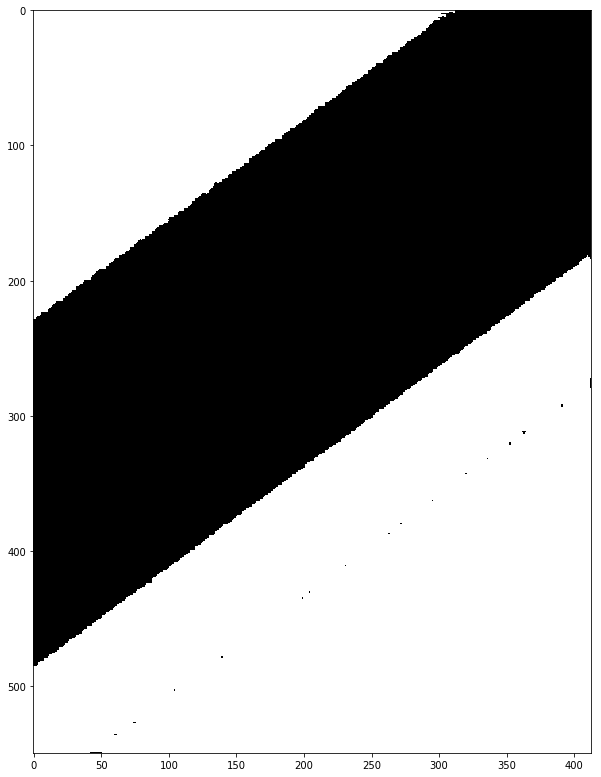

In [14]:
p_print(thresh2,10,15,'gray')

In [15]:
 ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)

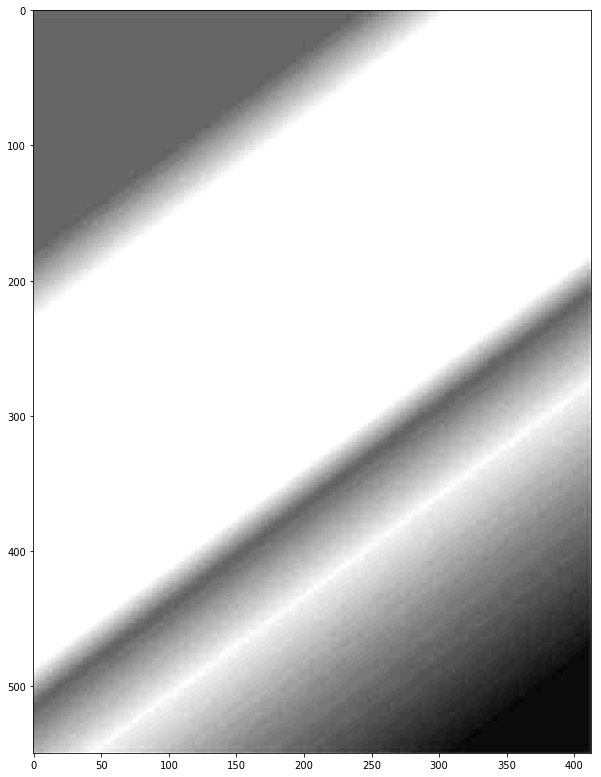

In [16]:
p_print(thresh3,10,15,'gray')

In [17]:
 ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

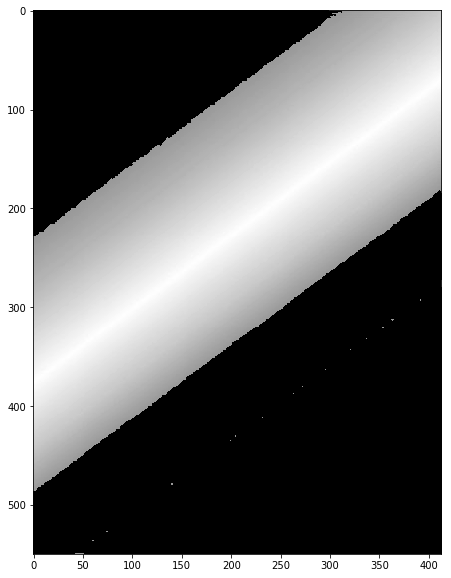

In [18]:
p_print(thresh4,15,10,'gray')

In [19]:
 ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

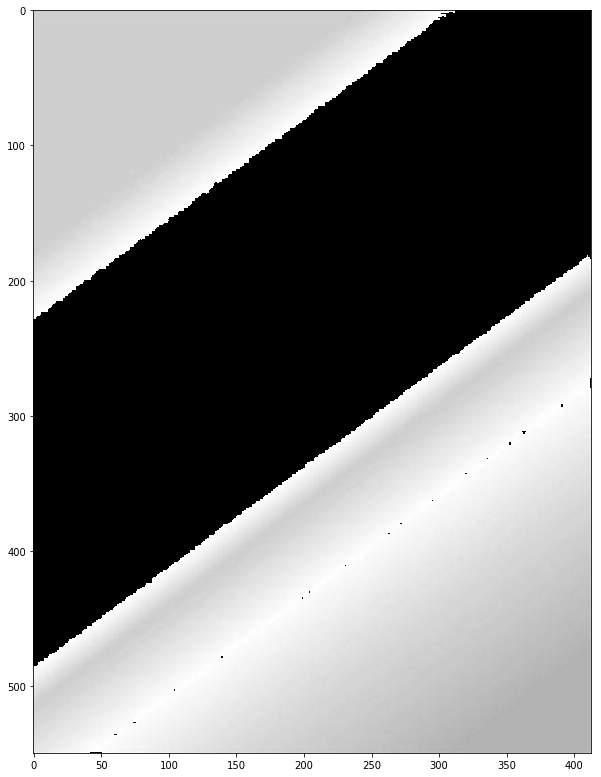

In [20]:
p_print(thresh5,10,15,'gray')

## Real world application :

In [21]:
img = cv2.imread('crossword.jpg',0) # read as gray scale

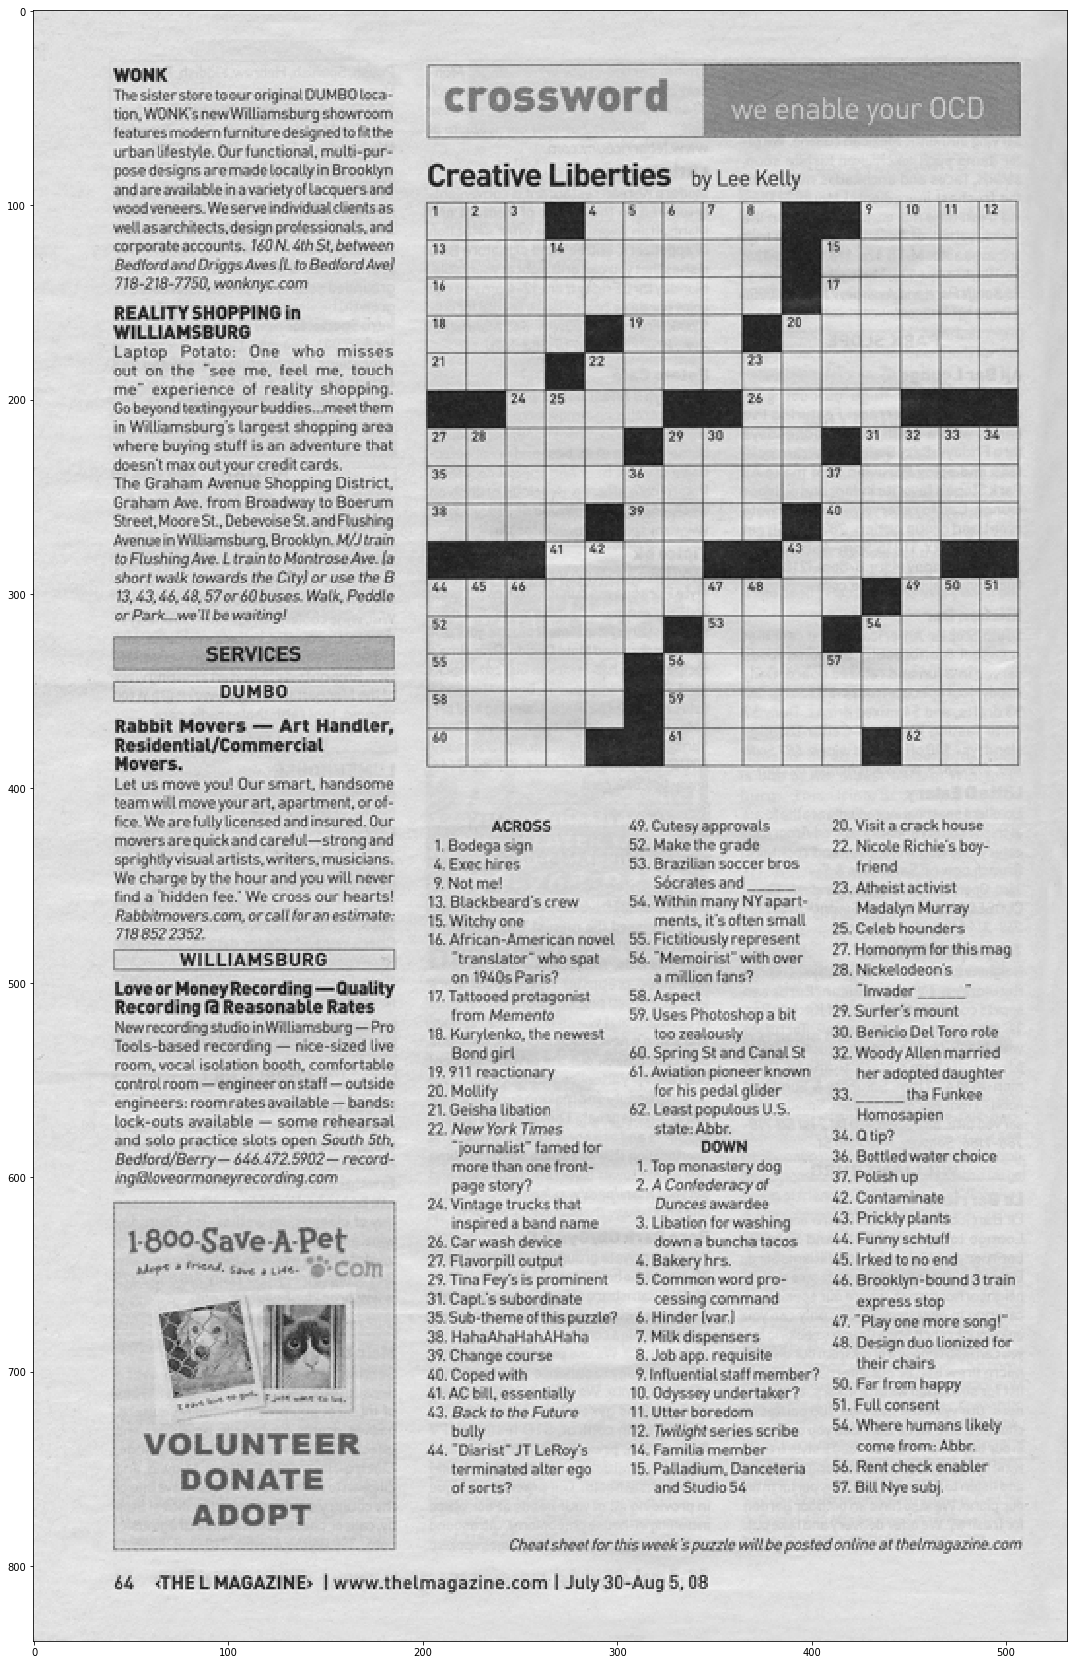

In [26]:
p_print(img,20,30,'gray')

In [28]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

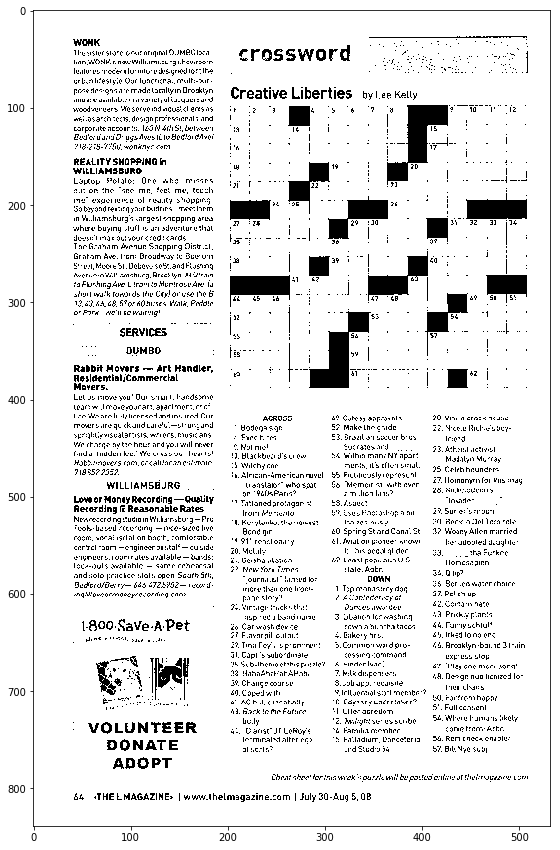

In [30]:
p_print(thresh,10,15,'gray')

# quality of image reduced

In [31]:
ret,thresh = cv2.threshold(img,200,255,cv2.THRESH_BINARY) # try another threshold value (upper value)

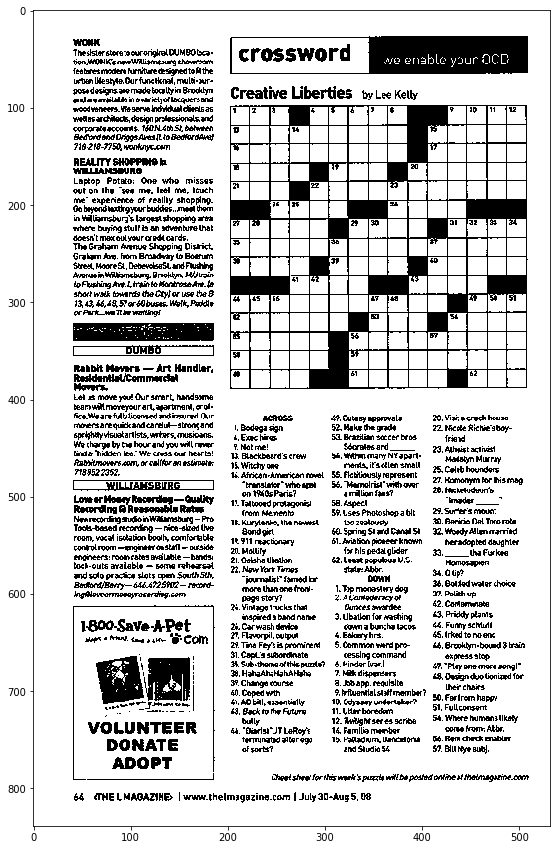

In [35]:
p_print(thresh,10,15,'gray')

In [37]:
ret,thresh = cv2.threshold(img,170,255,cv2.THRESH_BINARY) # try another threshold value (lower value)

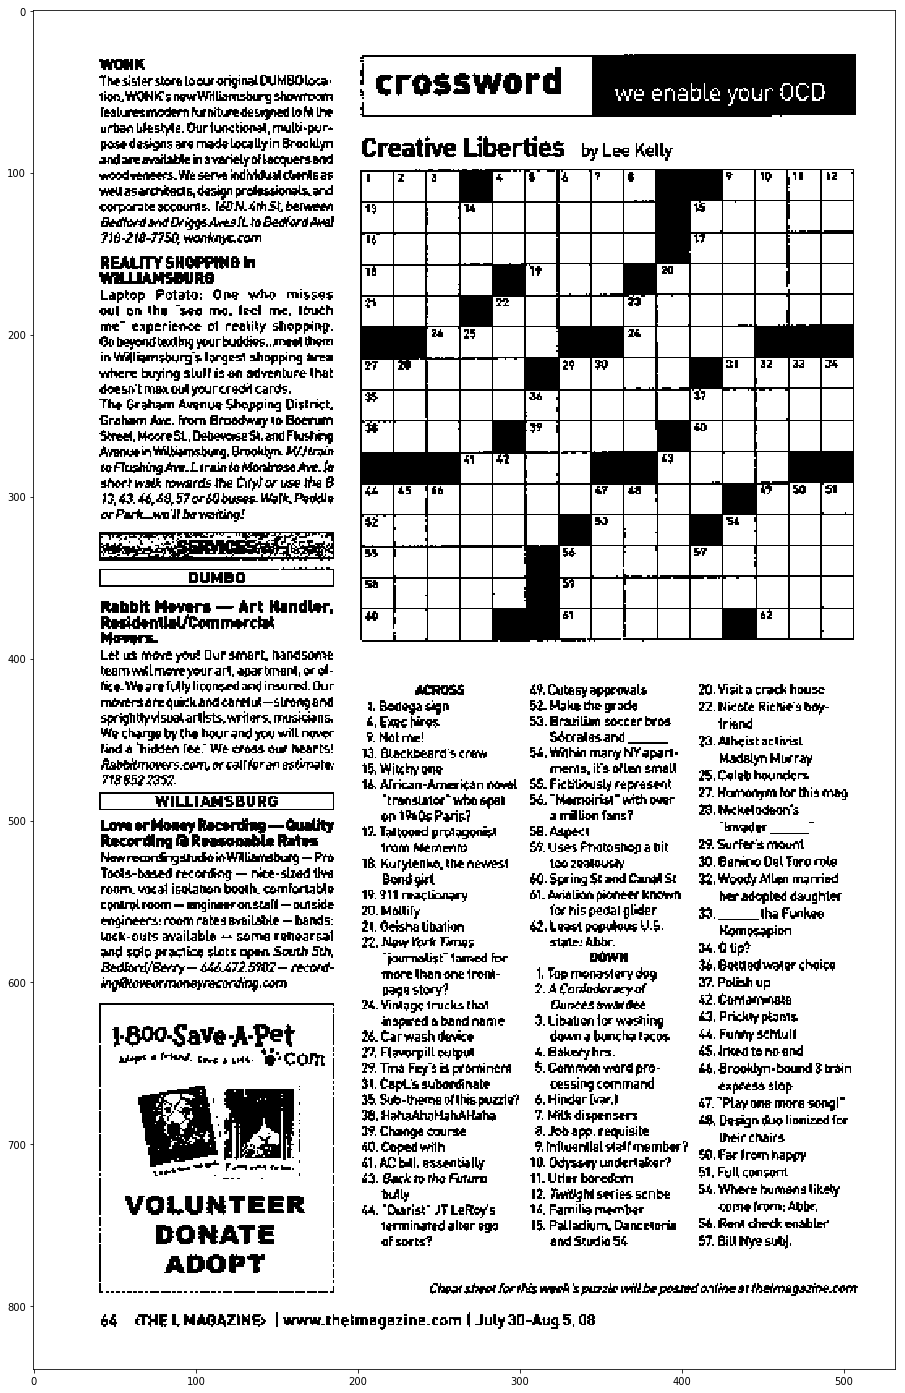

In [38]:
p_print(thresh,20,25,'gray')

In [39]:
adp_threshold = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)

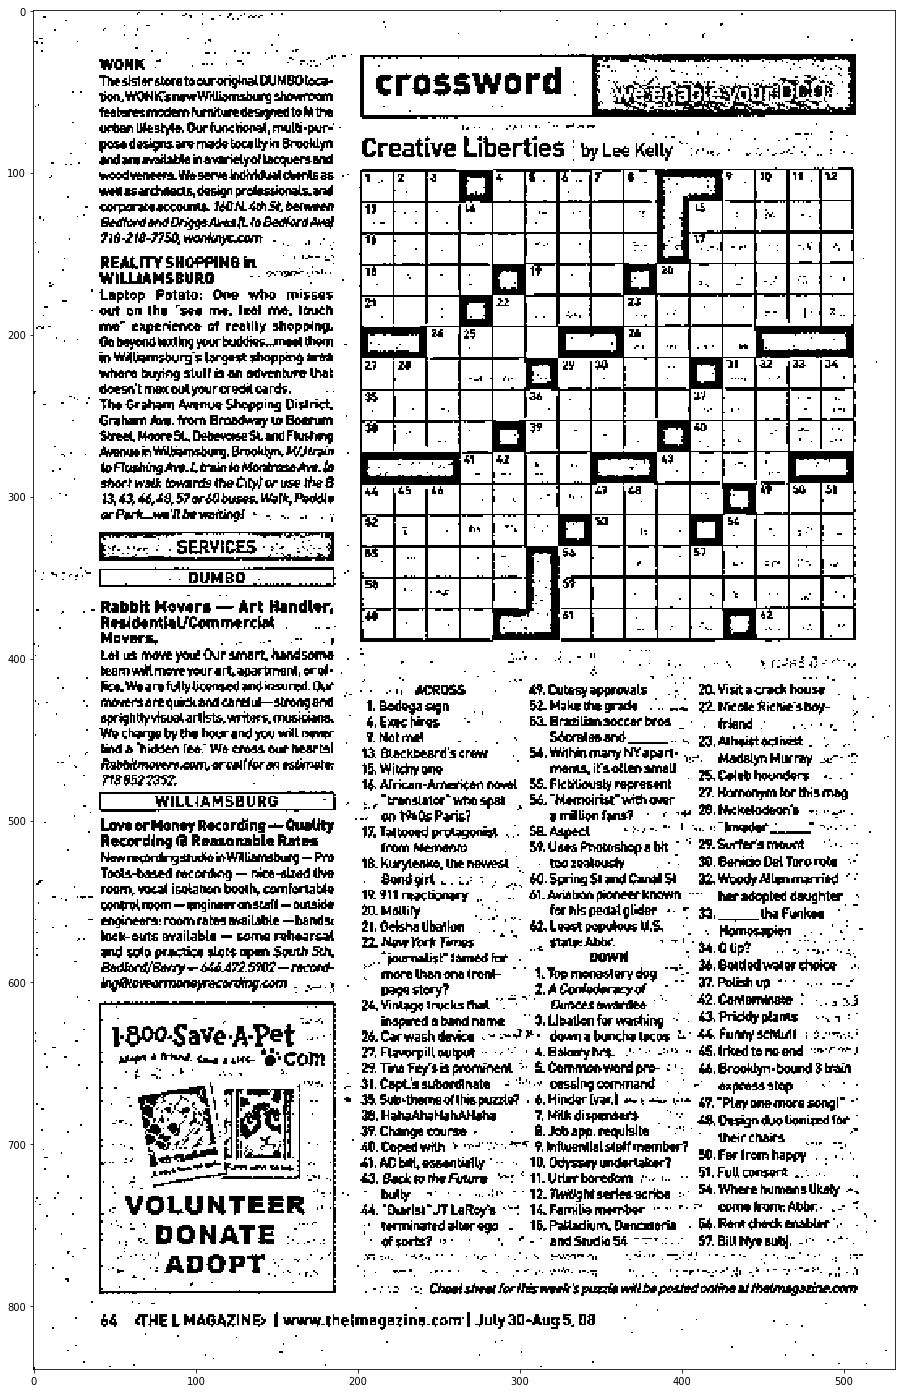

In [40]:
p_print(adp_threshold,20,25,'gray')

In [45]:
# blending thresh image and adp_thresh image : 
blended = cv2.addWeighted(src1=thresh,alpha = 0.6,src2=adp_threshold,beta =0.4,gamma=0)

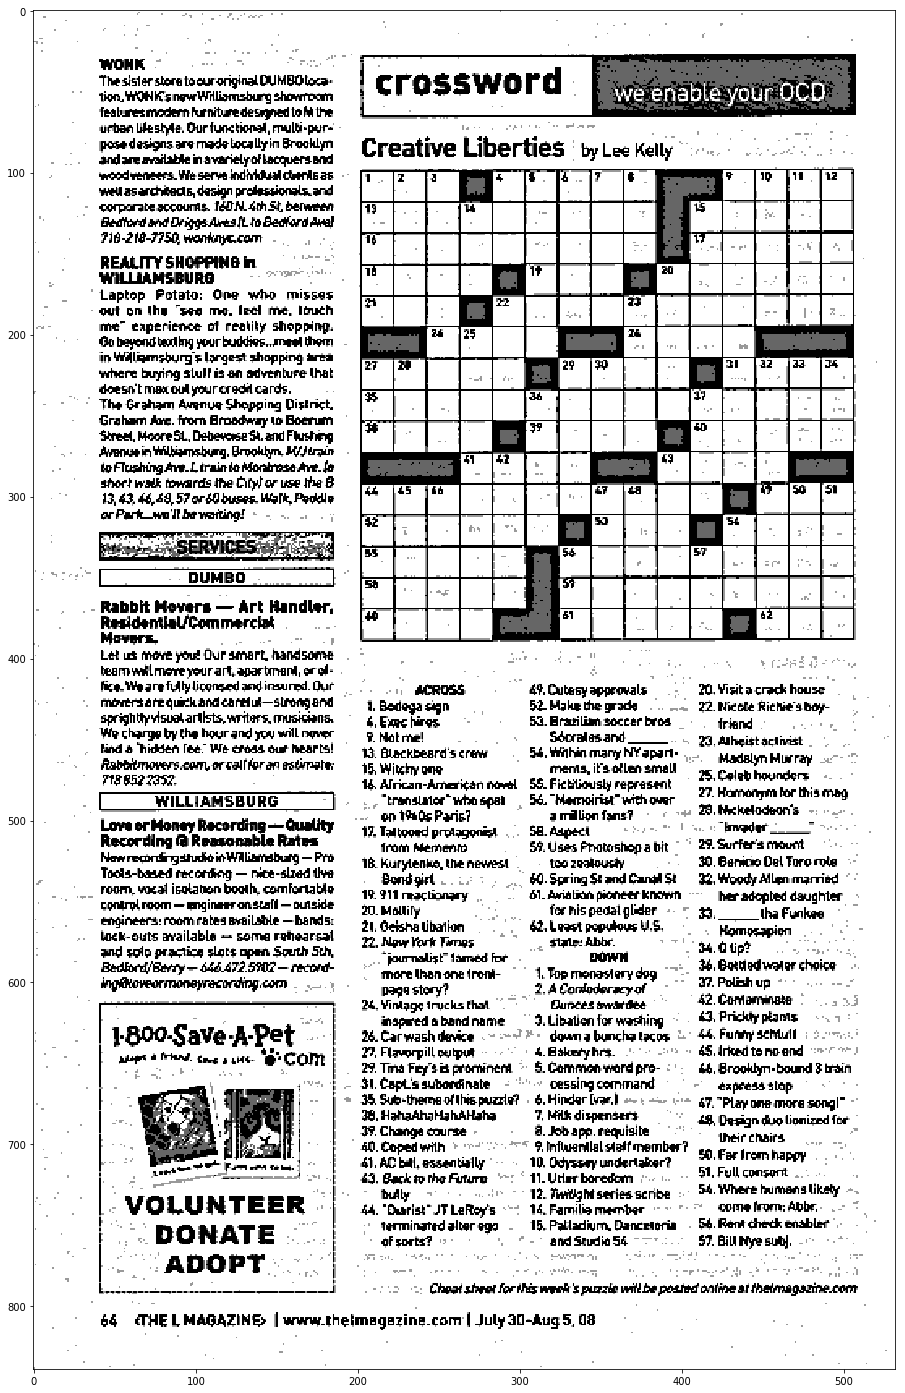

In [46]:
p_print(blended,20,25,'gray') # Nice :))